<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/L3_CamVid_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import untar_data, URLs, get_image_files, open_image, open_mask, ImageImageList
# from fastai.callbacks.hooks import Image
# from fastai.utils.mem import 

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
camvid_url = URLs.CAMVID
path = untar_data(camvid_url)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels')]

In [5]:
!ls /root/.fastai/

config.yml  data


In [6]:
image_path = path/'images'
image_labels = path/'labels'

In [7]:
image_fnames = get_image_files(image_path)
labels_fnames = get_image_files(image_labels)

In [8]:
image_fnames[:5]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_009330.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08079.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f02700.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03030.png')]

In [9]:
labels_fnames[:5]

[PosixPath('/root/.fastai/data/camvid/labels/0006R0_f00960_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_00480_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06210_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f01770_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_007230_P.png')]

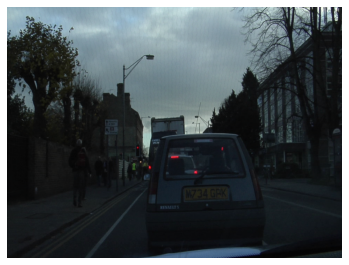

In [11]:
img = open_image(image_fnames[0])
img.show(figsize=(6,6))

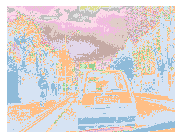

In [12]:
img_mask = open_mask(image_fnames[0])
img_mask.show()

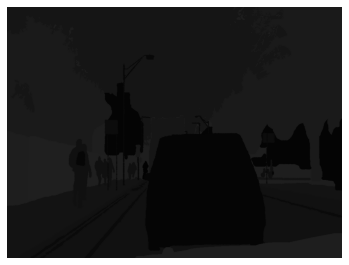

In [12]:
get_y_fn = lambda x : image_labels/f'{x.stem}_P{x.suffix}'
image_labels_mask = open_image(get_y_fn(image_fnames[0]))
image_labels_mask.show(figsize=(6,6), alpha=10)

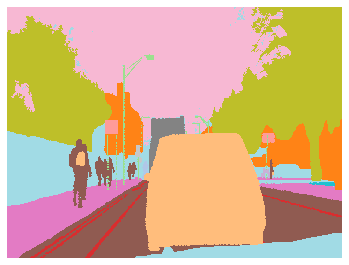

In [14]:
get_y_fn = lambda x : image_labels/f'{x.stem}_P{x.suffix}'
img_mask_pixel = open_mask(get_y_fn(image_fnames[0]))
img_mask_pixel.show(figsize=(6,6), alpha=10)

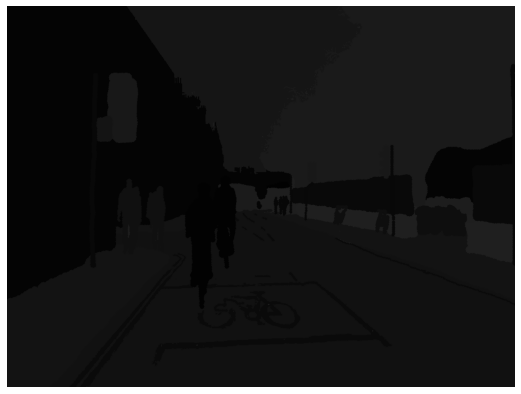

In [15]:
img_png = open_image('/root/.fastai/data/camvid/labels/0016E5_08079_P.png')
img_png.show(figsize=(10,7))

In [10]:
import numpy as np

In [13]:
image_labels_mask.shape

torch.Size([3, 720, 960])

In [14]:
image_labels_mask.data

tensor([[[0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         ...,
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176],
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176],
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         ...,
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176],
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176],
         [0.0745, 0.0745, 0.0745,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.1020],
         [0.0824, 0.0824, 0.0824,  ..., 0.1020, 0.1020, 0.

In [19]:
img_mask_pixel.data

tensor([[[21, 21, 21,  ..., 26, 26, 26],
         [21, 21, 21,  ..., 26, 26, 26],
         [21, 21, 21,  ..., 26, 26, 26],
         ...,
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30],
         [19, 19, 19,  ..., 30, 30, 30]]])

In [15]:
codes = np.loadtxt(path/'codes.txt', dtype='str'); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [16]:
from fastai.vision import ImageList, ImageImageList, SegmentationItemList, get_transforms, imagenet_stats, DatasetType

In [17]:
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [18]:
src = SegmentationItemList.from_folder(image_path).split_by_fname_file(path/'valid.txt').label_from_func(get_y_fn, classes=codes)

In [24]:
src

LabelLists;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None

In [19]:
size = np.array(image_labels_mask.shape[1:])
size=size//2
bs=2
data = src.transform(get_transforms(), size=size, tfm_y=True).databunch(bs=bs).normalize(imagenet_stats)

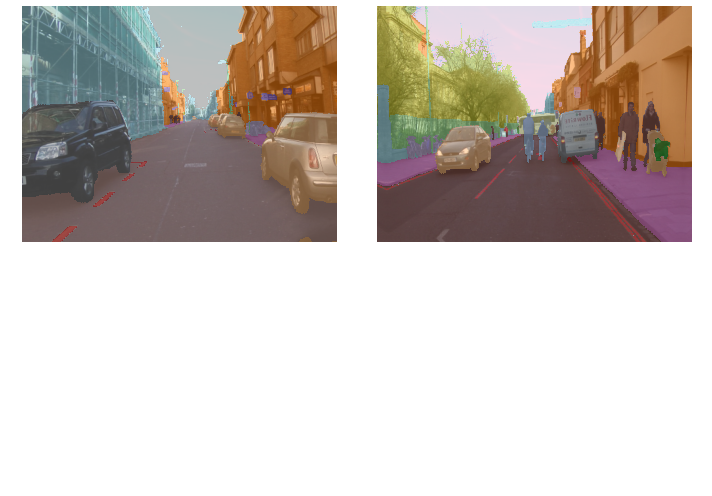

In [20]:
data.show_batch(2, figsize=(10,7))

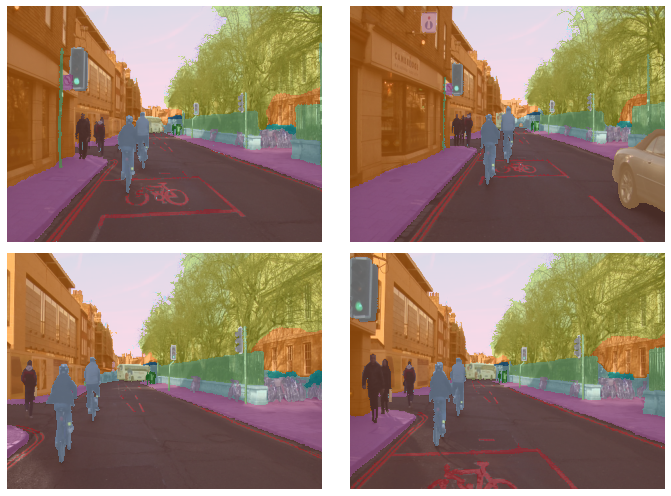

In [40]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [21]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [22]:
metrics=acc_camvid

In [23]:
wd=1e-2


In [24]:
from fastai.vision import unet_learner, models, lr_find

In [25]:
learn = unet_learner(data, models.resnet34, wd=1e-2)

In [26]:
lr_find(learn)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [27]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200:
  bs=8
else:
  bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 13257MB of GPU RAM free


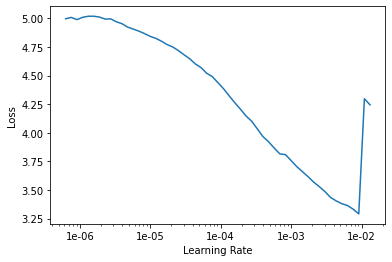

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(8, max_lr=slice(1e-3), pct_start=0.9)

epoch,train_loss,valid_loss,time
0,0.885195,0.804663,01:30
1,0.755728,0.664218,01:28
2,0.648099,0.559802,01:28
3,0.654880,0.618216,01:28
4,0.599838,0.465775,01:27
5,0.588157,0.480463,01:27
6,0.505681,0.446357,01:27
7,0.381765,0.308686,01:27


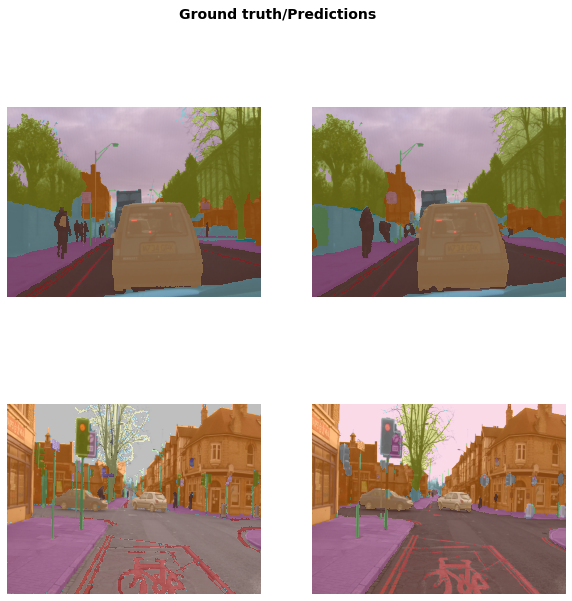

In [32]:
learn.save('stage-1')
learn.load('stage-1')
learn.show_results(3, figsize=(10,10))

In [33]:
learn.unfreeze()

In [34]:
lrs = slice(1e-3/400, 1e-3/4)
learn.fit_one_cycle(12, max_lr=lrs, pct_start=0.8)

epoch,train_loss,valid_loss,time
0,0.367912,0.305729,01:33
1,0.348934,0.299195,01:33
2,0.348681,0.285796,01:33
3,0.352675,0.296769,01:33
4,0.337340,0.283918,01:33
5,0.316943,0.272142,01:33
6,0.307308,0.280576,01:33
7,0.314108,0.286561,01:33
8,0.300034,0.251088,01:33
9,0.276045,0.281579,01:33


In [35]:
learn.interpret

<bound method _learner_interpret of Learner(data=ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [36]:
learn.save('stage-2');

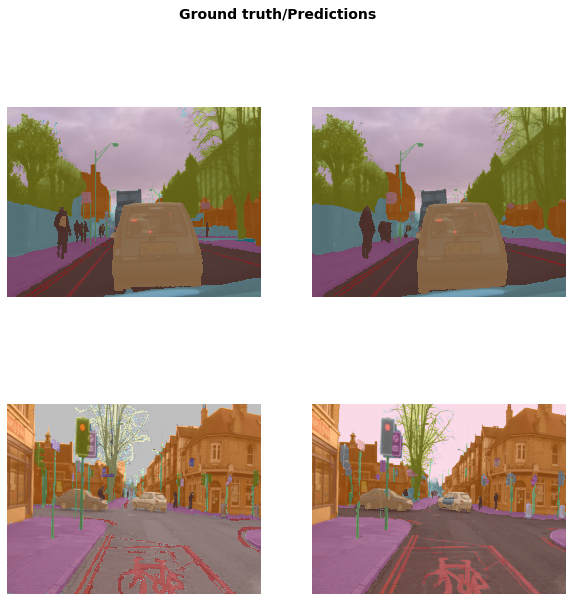

In [37]:
learn.show_results(3, figsize=(10,10))